In [1]:
from pickle_file import load_obj
from collections import defaultdict
import numpy as np

#data_path = '/home/xiangnan/task_space_code/task_space_data/'
data_path = 'D:/CSH/stack_overflow/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'

df_task_space = load_obj('umapdf_DBSCAN2_level1_user_count', data_path_save + 'task_space_draw/')
df_cluster_adjusted = load_obj('cluster_conclusion_adjusted', data_path_save + 'task_space_draw/')

level = 1

programming_language_std_adjusted = load_obj('programming_language_std_adjusted', data_path_save)
L_dict = {l:i for i,l in enumerate(programming_language_std_adjusted)}
community_list_core_std = load_obj(f"community_list_std_core_cut_level{level}", data_path_save + 'networks/probability/')
C_dict = {c:i for i,c in enumerate(community_list_core_std)}
community_core_level = load_obj(f"community_core_with_cut_level{level}", data_path_save + 'networks/probability/')

tag_community_dict = {}
for i,c in community_core_level.items():
    for t in c:
        tag_community_dict[t] = i


import matplotlib.pyplot as plt

In [3]:
df

,task,task_value,value_rank
0,4,11.932052,0
1,88,11.925838,1
2,107,11.920901,2
3,95,11.907568,3
4,242,11.901752,4
...,...,...,...
232,93,11.586658,232
233,40,11.572992,233
234,66,11.572391,234
235,219,11.567222,235


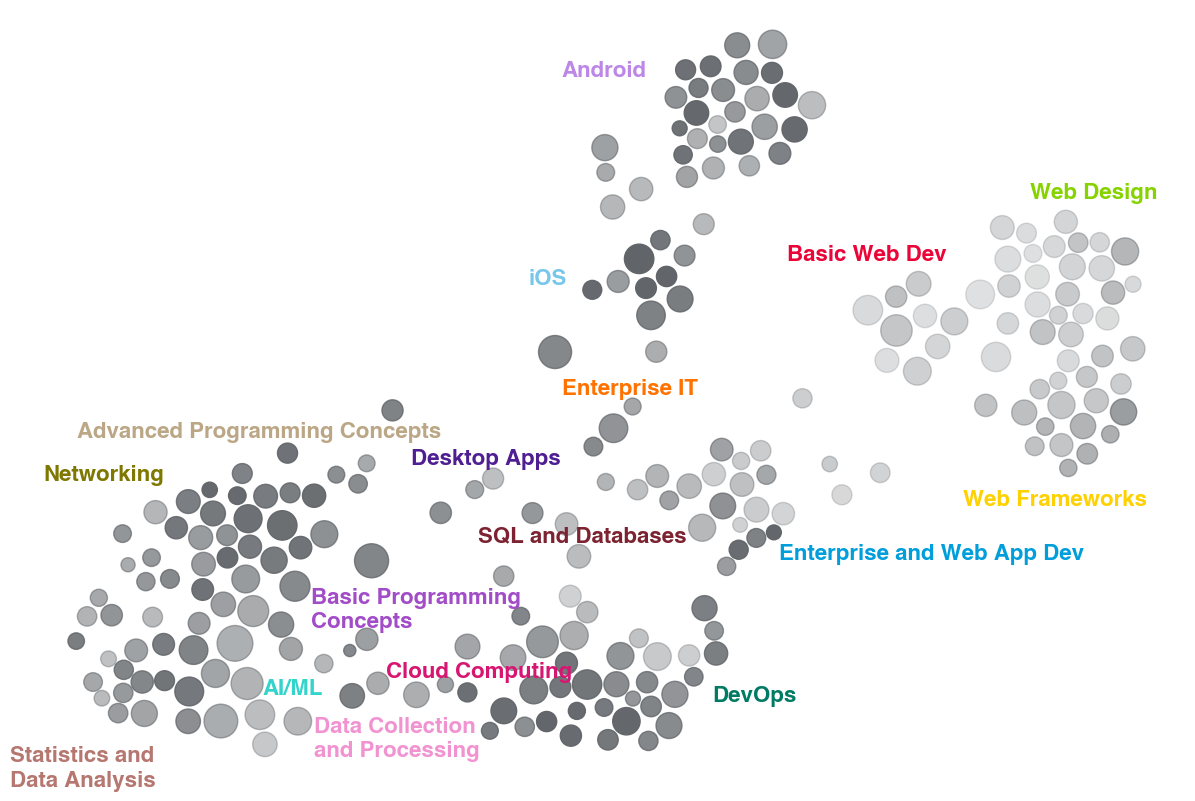

In [ ]:
import pandas as pd
df = load_obj('df_task_value_2023')
df_value_dict = pd.Series(df.value_rank.values,index=df.task).to_dict()


task_user_set_all = defaultdict(set)
for yr in range(2008, 2024):
    task_user_set = load_obj(f'task_user_set_{yr}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
    for u, tsl in task_user_set.items():
        for t in tsl:
            task_user_set_all[t].add(u)

task_user_count = {t:len(ul) for t, ul in task_user_set_all.items()}
task_size_list = [np.sqrt(task_user_count[t[10:]]) * 1.2 for t in df_task_space.occ_code]

fig = plt.figure(figsize=(15,10))

import matplotlib.font_manager

font_dirs = ['D:/software/helvetica-255/', ]
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=font_dirs)
for ff in font_files:
    matplotlib.font_manager.fontManager.addfont(ff)

plt.rcParams['font.family'] = ['Helvetica']

original_list = [df_value_dict[t[10:]] for t in df_task_space.occ_code]
tuned_min = 1
tuned_max = 0.2

a_linear = (tuned_max - tuned_min) /(max(original_list) - min(original_list))
b_linear = tuned_max - a_linear * max(original_list)
adjust_list = [a_linear * s + b_linear for s in original_list]

plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s = task_size_list, c = '#616569', alpha = adjust_list)

#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=adjust_list,c = 'none', edgecolors=[df_task_space.node_color[i] for i in df_task_space.index], linewidths=0.5)
#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=task_size_list,c = 'none', edgecolors = df_task_space.node_color, linewidths=1.5)

for x, y, t,c in zip(df_cluster_adjusted.x, df_cluster_adjusted.y,df_cluster_adjusted.description, df_cluster_adjusted.color):
    plt.text(x,y,t, fontdict={'family':'Helvetica','weight':'bold','size':16, 'c':c})
    #plt.text(x,y,t)

#plt.text(0,6,f'{tlp[0]} ~ {tlp[-1]}', fontdict={'family':'sans-serif','weight' : 'bold','size'   : 23,})

ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(0);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(0);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细

plt.xticks([],[])
plt.yticks([],[])
plt.savefig('figure_3d_task_value_space.svg', format = 'svg', transparent = True)

plt.show()



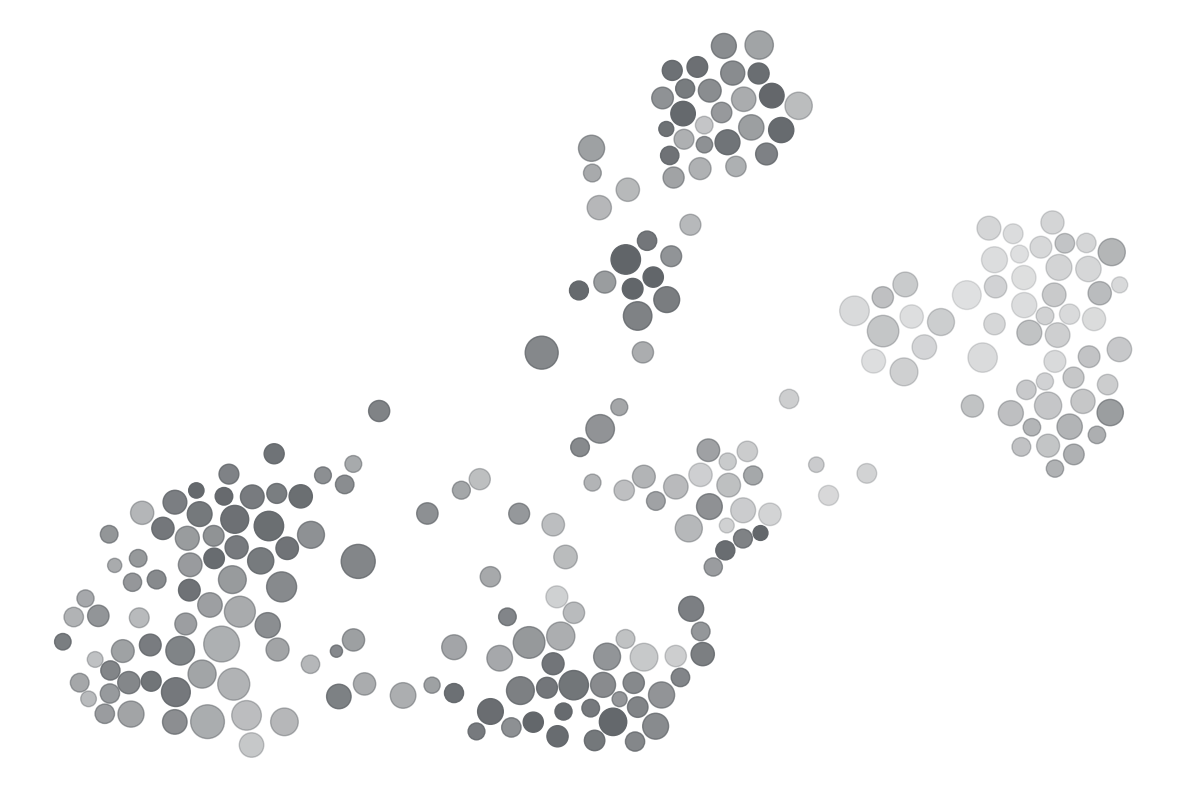

In [5]:
fig = plt.figure(figsize=(15,10))

import matplotlib.font_manager

font_dirs = ['D:/software/helvetica-255/', ]
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=font_dirs)
for ff in font_files:
    matplotlib.font_manager.fontManager.addfont(ff)

plt.rcParams['font.family'] = ['Helvetica']

original_list = [df_value_dict[t[10:]] for t in df_task_space.occ_code]
tuned_min = 1
tuned_max = 0.2

a_linear = (tuned_max - tuned_min) /(max(original_list) - min(original_list))
b_linear = tuned_max - a_linear * max(original_list)
adjust_list = [a_linear * s + b_linear for s in original_list]

plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s = task_size_list, c = '#616569', alpha = adjust_list)

#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=adjust_list,c = 'none', edgecolors=[df_task_space.node_color[i] for i in df_task_space.index], linewidths=0.5)
#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=task_size_list,c = 'none', edgecolors = df_task_space.node_color, linewidths=1.5)

#for x, y, t,c in zip(df_cluster_adjusted.x, df_cluster_adjusted.y,df_cluster_adjusted.description, df_cluster_adjusted.color):
    #plt.text(x,y,t, fontdict={'family':'Helvetica','weight':'bold','size':16, 'c':c})
    #plt.text(x,y,t)

#plt.text(0,6,f'{tlp[0]} ~ {tlp[-1]}', fontdict={'family':'sans-serif','weight' : 'bold','size'   : 23,})

ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(0);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(0);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细

plt.xticks([],[])
plt.yticks([],[])
plt.savefig('figure_3d_task_value_space_no_label.png', format = 'png', transparent = True)

plt.show()

In [1]:
from matplotlib.colors import LinearSegmentedColormap

#从白色到红色再到黑色
bounds = [0, 0.5, 1]
colors = [(0.3804, 0.3961, 0.4118,0.2), (0.3804, 0.3961, 0.4118,0.6), (0.3804, 0.3961, 0.4118,1)]
cmap = LinearSegmentedColormap.from_list('mymap', list(zip(bounds, colors)), N = 323)
#sns.heatmap(data, cmap = cmap)

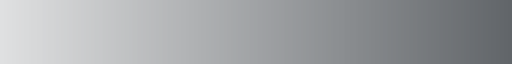

In [7]:
cmap

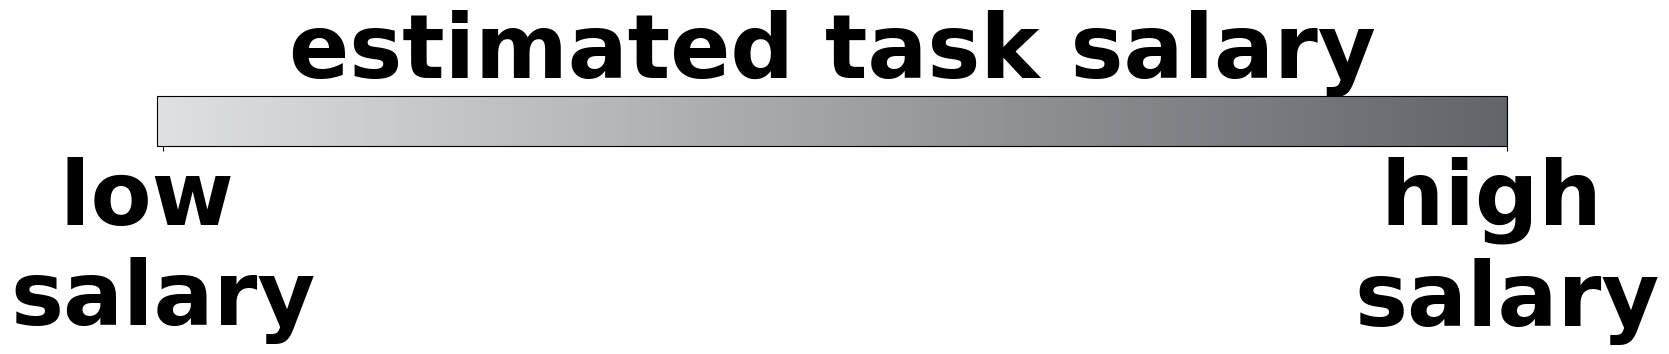

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(15,10))
#ax = fig.add_axes([0.05, 0.9, 0.06, 1])
ax = fig.add_axes([0.05, 0.8, 0.9, 0.05])
cmap = cmap
C = [1, 237]

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=cmap,
                               norm=mpl.colors.Normalize(0, max(C)),  # vmax and vmin
                               #extend='both',
                               ticks=[1,237])

ax.tick_params(labelsize = 23)
cb.ax.set_title(label='estimated task salary',weight='bold',size = 64)
cb.ax.set_xticklabels(['low \nsalary', 'high \nsalary'], size = 64, weight = 'bold')  # horizontal colorbar
plt.savefig('output/figure_3d_colorbar.svg', format = 'svg', bbox_inches='tight', transparent = True)
plt.show()

In [ ]:
from pickle_file import load_obj
import pandas as pd
df = load_obj('df_task_value_2023')
df_dict = pd.Series(df.task_value.values,index=df.task).to_dict()


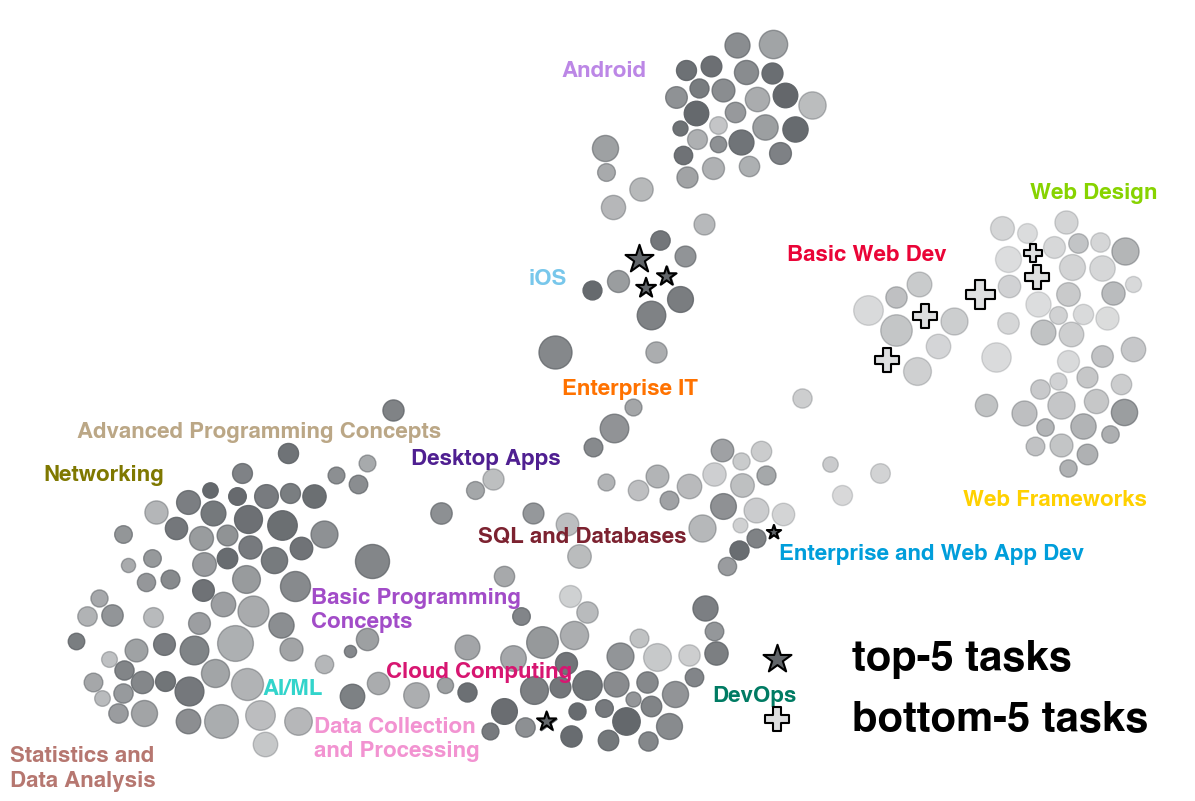

In [6]:
import pandas as pd
df = load_obj('df_task_value_2023')
df_value_dict = pd.Series(df.value_rank.values,index=df.task).to_dict()
task_value_sorted = sorted(df_value_dict.items(), key = lambda kv:(-kv[1], kv[0]))

low_value_task = [t[0] for t in task_value_sorted[:5]]
high_value_task = [t[0] for t in task_value_sorted[-5:]]

task_user_set_all = defaultdict(set)
for yr in range(2008, 2024):
    task_user_set = load_obj(f'task_user_set_{yr}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
    for u, tsl in task_user_set.items():
        for t in tsl:
            task_user_set_all[t].add(u)

task_user_count = {t:len(ul) for t, ul in task_user_set_all.items()}
task_size_list = [np.sqrt(task_user_count[t[10:]]) * 1.2 for t in df_task_space.occ_code]

fig = plt.figure(figsize=(15,10))

import matplotlib.font_manager

font_dirs = ['D:/software/helvetica-255/', ]
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=font_dirs)
for ff in font_files:
    matplotlib.font_manager.fontManager.addfont(ff)

plt.rcParams['font.family'] = ['Helvetica']

original_list = [df_value_dict[t[10:]] for t in df_task_space.occ_code]
tuned_min = 1
tuned_max = 0.2

a_linear = (tuned_max - tuned_min) /(max(original_list) - min(original_list))
b_linear = tuned_max - a_linear * max(original_list)
adjust_list = [a_linear * s + b_linear for s in original_list]

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] not in high_value_task and t[10:] not in low_value_task:  
        plt.scatter(x, y, s = s, c = '#616569', alpha = a)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in high_value_task[:4]:  
        plt.scatter(x, y, s = s,marker = '*', c = '#616569', alpha = a)
        plt.scatter(x, y, s=s,marker='*',c = 'none', edgecolors = 'k', linewidths=1.5)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in low_value_task[:4]:  
        plt.scatter(x, y, s = s,marker='P', c = '#616569', alpha = a)
        plt.scatter(x, y, s=s,marker='P',c = 'none', edgecolors = 'k', linewidths=1.5)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in high_value_task[4:]:  
        plt.scatter(x, y, s = s,marker = '*', c = '#616569', alpha = a, edgecolors = 'k', linewidths=1.5, label = 'top-5 tasks')
        #plt.scatter(x, y, s=s,marker='*',c = 'none', edgecolors = 'k', linewidths=1.5)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in low_value_task[4:]:  
        plt.scatter(x, y, s = s,marker='P',facecolor=(97/255,101/255,105/255,a), edgecolors = (0,0,0,1), linewidths=1.5, label = 'bottom-5 tasks')
        #plt.scatter(x, y, s=s,marker='P',c = 'none', edgecolors = 'k', linewidths=1.5)

#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=adjust_list,c = 'none', edgecolors=[df_task_space.node_color[i] for i in df_task_space.index], linewidths=0.5)
#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=task_size_list,c = 'none', edgecolors = df_task_space.node_color, linewidths=1.5)

for x, y, t,c in zip(df_cluster_adjusted.x, df_cluster_adjusted.y,df_cluster_adjusted.description, df_cluster_adjusted.color):
    plt.text(x,y,t, fontdict={'family':'Helvetica','weight':'bold','size':16, 'c':c})
    #plt.text(x,y,t)

#plt.text(0,6,f'{tlp[0]} ~ {tlp[-1]}', fontdict={'family':'sans-serif','weight' : 'bold','size'   : 23,})

ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(0);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(0);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细

plt.xticks([],[])
plt.yticks([],[])

font1 = {'family':'helvetica',
        'weight' : 'bold',
        'size'   : 30,
}
legend = plt.legend(prop=font1, frameon = False, bbox_to_anchor=(0.58, 0.23))


plt.savefig('output/figure_3d_task_value_space_top_bottom.png', format = 'png', transparent = True)


plt.show()

